# Libraries Needed

In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import ast
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Check and see the correlation for numerical variables

In [6]:
df_forest = pd.read_csv('anime_details_cleaned+genres_new.csv')
df_forest = df_forest.dropna()
df_forest['mean'] = df_forest['mean'].round(0) # you will round to make a class

df_forest = df_forest.dropna()

df_forest['mean'] = df_forest['mean'].round(0) # you will round to make a class

# Pairplot of the numerical features

In [7]:
df_new = pd.read_csv('anime_details_cleaned_new.csv')

In [8]:
df_new.head()

,id,title,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,rating,studios,start_season.year,start_season.season,statistics.watching,statistics.completed,statistics.on_hold,statistics.dropped,statistics.plan_to_watch,statistics.num_list_users
0,51535,Shingeki no Kyojin: The Final Season - Kankets...,9.17,1.0,612,345648,94303,white,special,currently_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",2,manga,r,"[{'id': 569, 'name': 'MAPPA'}]",2023.0,winter,150067,1734,10059,564,183136,345560
1,5114,Fullmetal Alchemist: Brotherhood,9.11,2.0,3,3108741,1976421,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",64,manga,r,"[{'id': 4, 'name': 'Bones'}]",2009.0,spring,240733,2247431,105907,52260,462639,3108970
2,41467,Bleach: Sennen Kessen-hen,9.09,3.0,509,403470,182903,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",13,manga,r,"[{'id': 1, 'name': 'Pierrot'}]",2022.0,fall,99445,161903,4389,3071,134626,403434
3,9253,Steins;Gate,9.08,4.0,13,2393155,1311891,white,tv,finished_airing,"[{'id': 8, 'name': 'Drama'}, {'id': 40, 'name'...",24,visual_novel,pg_13,"[{'id': 314, 'name': 'White Fox'}]",2011.0,spring,157249,1500562,84283,50903,600304,2393301
4,28977,Gintama°,9.07,5.0,335,581856,232873,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 4, 'name'...",51,manga,pg_13,"[{'id': 1258, 'name': 'Bandai Namco Pictures'}]",2015.0,spring,64132,241807,22772,17051,236098,581860


C:\Users\leeju\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


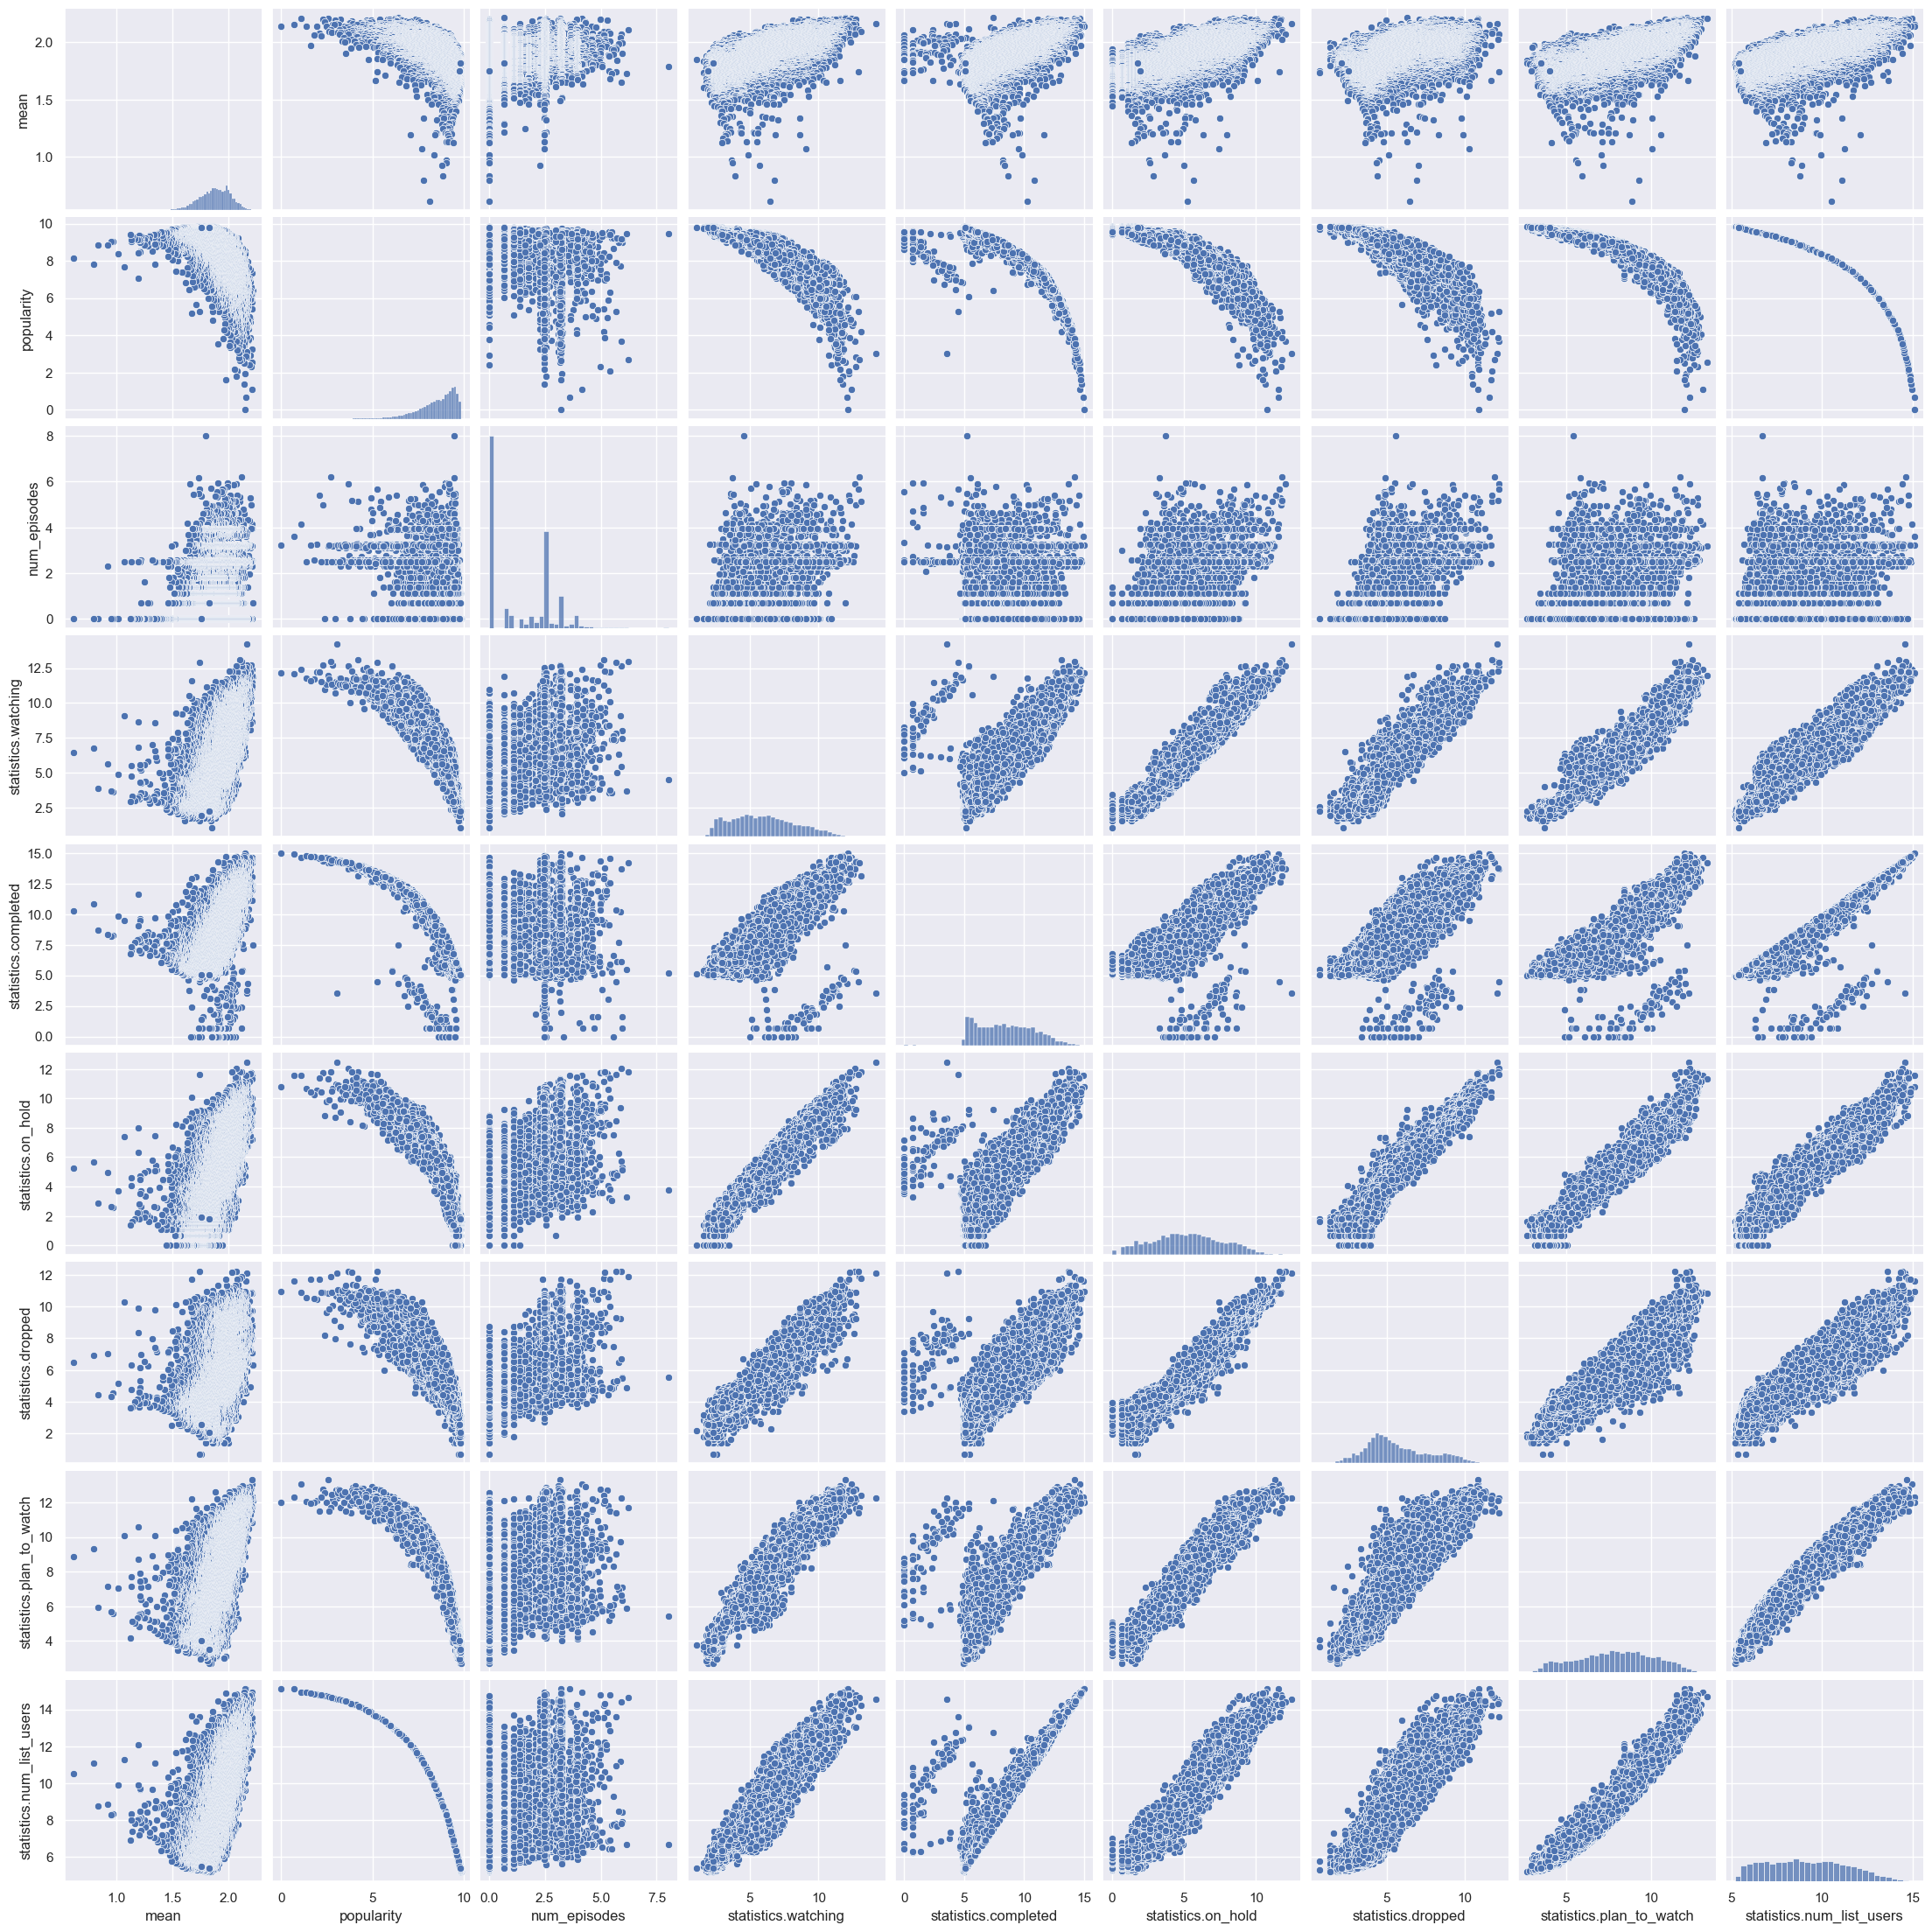

In [24]:
df_new = pd.read_csv('anime_details_cleaned_new.csv')
pd.set_option('display.max_columns', None)
df_drop = df_new.drop(['nsfw','rating','num_list_users','id','rank','title','id','num_scoring_users','media_type','status','genres','source','studios','start_season.year','start_season.season'], axis=1)
sb.pairplot(data = np.log(df_drop))

# Analysis

* With mean, all the numerical features seems to have a slight correlation with the mean

# Random Forest method to pick best features

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
genress = ['Parody', 'Action', 'Comedy',
       'Organized Crime', 'Horror', 'Historical', 'Combat Sports',
       'Video Game', 'Otaku Culture', 'Gag Humor', 'Vampire', 'Reverse Harem',
       'Girls Love', 'Kids', 'Shoujo', 'Gourmet', 'Showbiz', 'Military',
       'Space', 'Music', 'Detective', 'Mythology', 'Romance', 'Martial Arts',
       'Romantic Subtext', 'Harem', 'Iyashikei', 'Time Travel', 'Ecchi',
       'Suspense', 'Idols (Male)', 'Pets', 'Workplace', 'Anthropomorphic',
       'Medical', 'Gore', 'Supernatural', 'Survival', 'Team Sports',
       'Crossdressing', 'Drama', 'Isekai', 'Racing', 'Childcare',
       'Mystery', 'Boys Love', 'Visual Arts', 'Mecha', 'Strategy Game',
       'Adult Cast', 'Idols (Female)', 'Fantasy', 'Super Power',
       'Mahou Shoujo', 'Sci-Fi', 'Psychological', 'Delinquents', 'Samurai',
       'School', 'CGDCT', 'Slice of Life', 'Reincarnation', 'Educational',
       'Avant Garde', 'Shounen', 'Seinen', 'Adventure', 'Josei',
       'Award Winning', 'Performing Arts', 'Love Polygon', 'Magical Sex Shift',
       'High Stakes Game', 'Sports']

## One hot encoding used for random forest

In [26]:
df_forest['watch_rate'] = (df_forest['statistics.completed'] + df_forest['statistics.watching']) / (df_forest['statistics.completed'] + df_forest['statistics.dropped'] + df_forest['statistics.on_hold'] + df_forest['statistics.watching'])
df_forest.drop(['statistics.watching','statistics.completed','statistics.on_hold','statistics.dropped'], axis=1, inplace=True)

In [28]:
df_forest.head()

,id,title,mean,rank,popularity,num_list_users,num_scoring_users,media_type,status,num_episodes,source,rating,studios,start_season.year,start_season.season,statistics.plan_to_watch,statistics.num_list_users,Award Winning,Comedy,High Stakes Game,School,Boys Love,Survival,Adventure,Detective,Educational,Martial Arts,Suspense,Kids,Visual Arts,Video Game,Shoujo,Performing Arts,Adult Cast,Mythology,Sports,Historical,Shounen,Idols (Female),Parody,no genre,Mystery,Iyashikei,Military,Team Sports,Combat Sports,Love Polygon,Workplace,Otaku Culture,Gag Humor,Drama,Vampire,Romance,Seinen,Crossdressing,Reverse Harem,Gourmet,Romantic Subtext,Slice of Life,Medical,Girls Love,Horror,Magical Sex Shift,Action,Gore,Music,Space,Fantasy,Ecchi,Psychological,Delinquents,Mahou Shoujo,Samurai,Super Power,Strategy Game,Isekai,Time Travel,Mecha,Anthropomorphic,Josei,Organized Crime,Showbiz,Harem,Racing,CGDCT,Reincarnation,Sci-Fi,Childcare,Idols (Male),Pets,Supernatural,Avant Garde,watch_rate
0,51535,Shingeki no Kyojin: The Final Season - Kankets...,9.0,1.0,612,345648,94303,special,currently_airing,2,manga,r,"[{'id': 569, 'name': 'MAPPA'}]",2023.0,winter,183136,345560,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.934597
1,5114,Fullmetal Alchemist: Brotherhood,9.0,2.0,3,3108741,1976421,tv,finished_airing,64,manga,r,"[{'id': 4, 'name': 'Bones'}]",2009.0,spring,462639,3108970,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.940232
2,41467,Bleach: Sennen Kessen-hen,9.0,3.0,509,403470,182903,tv,finished_airing,13,manga,r,"[{'id': 1, 'name': 'Pierrot'}]",2022.0,fall,134626,403434,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.972248
3,9253,Steins;Gate,9.0,4.0,13,2393155,1311891,tv,finished_airing,24,visual_novel,pg_13,"[{'id': 314, 'name': 'White Fox'}]",2011.0,spring,600304,2393301,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.924603
4,28977,Gintama°,9.0,5.0,335,581856,232873,tv,finished_airing,51,manga,pg_13,"[{'id': 1258, 'name': 'Bandai Namco Pictures'}]",2015.0,spring,236098,581860,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Fal

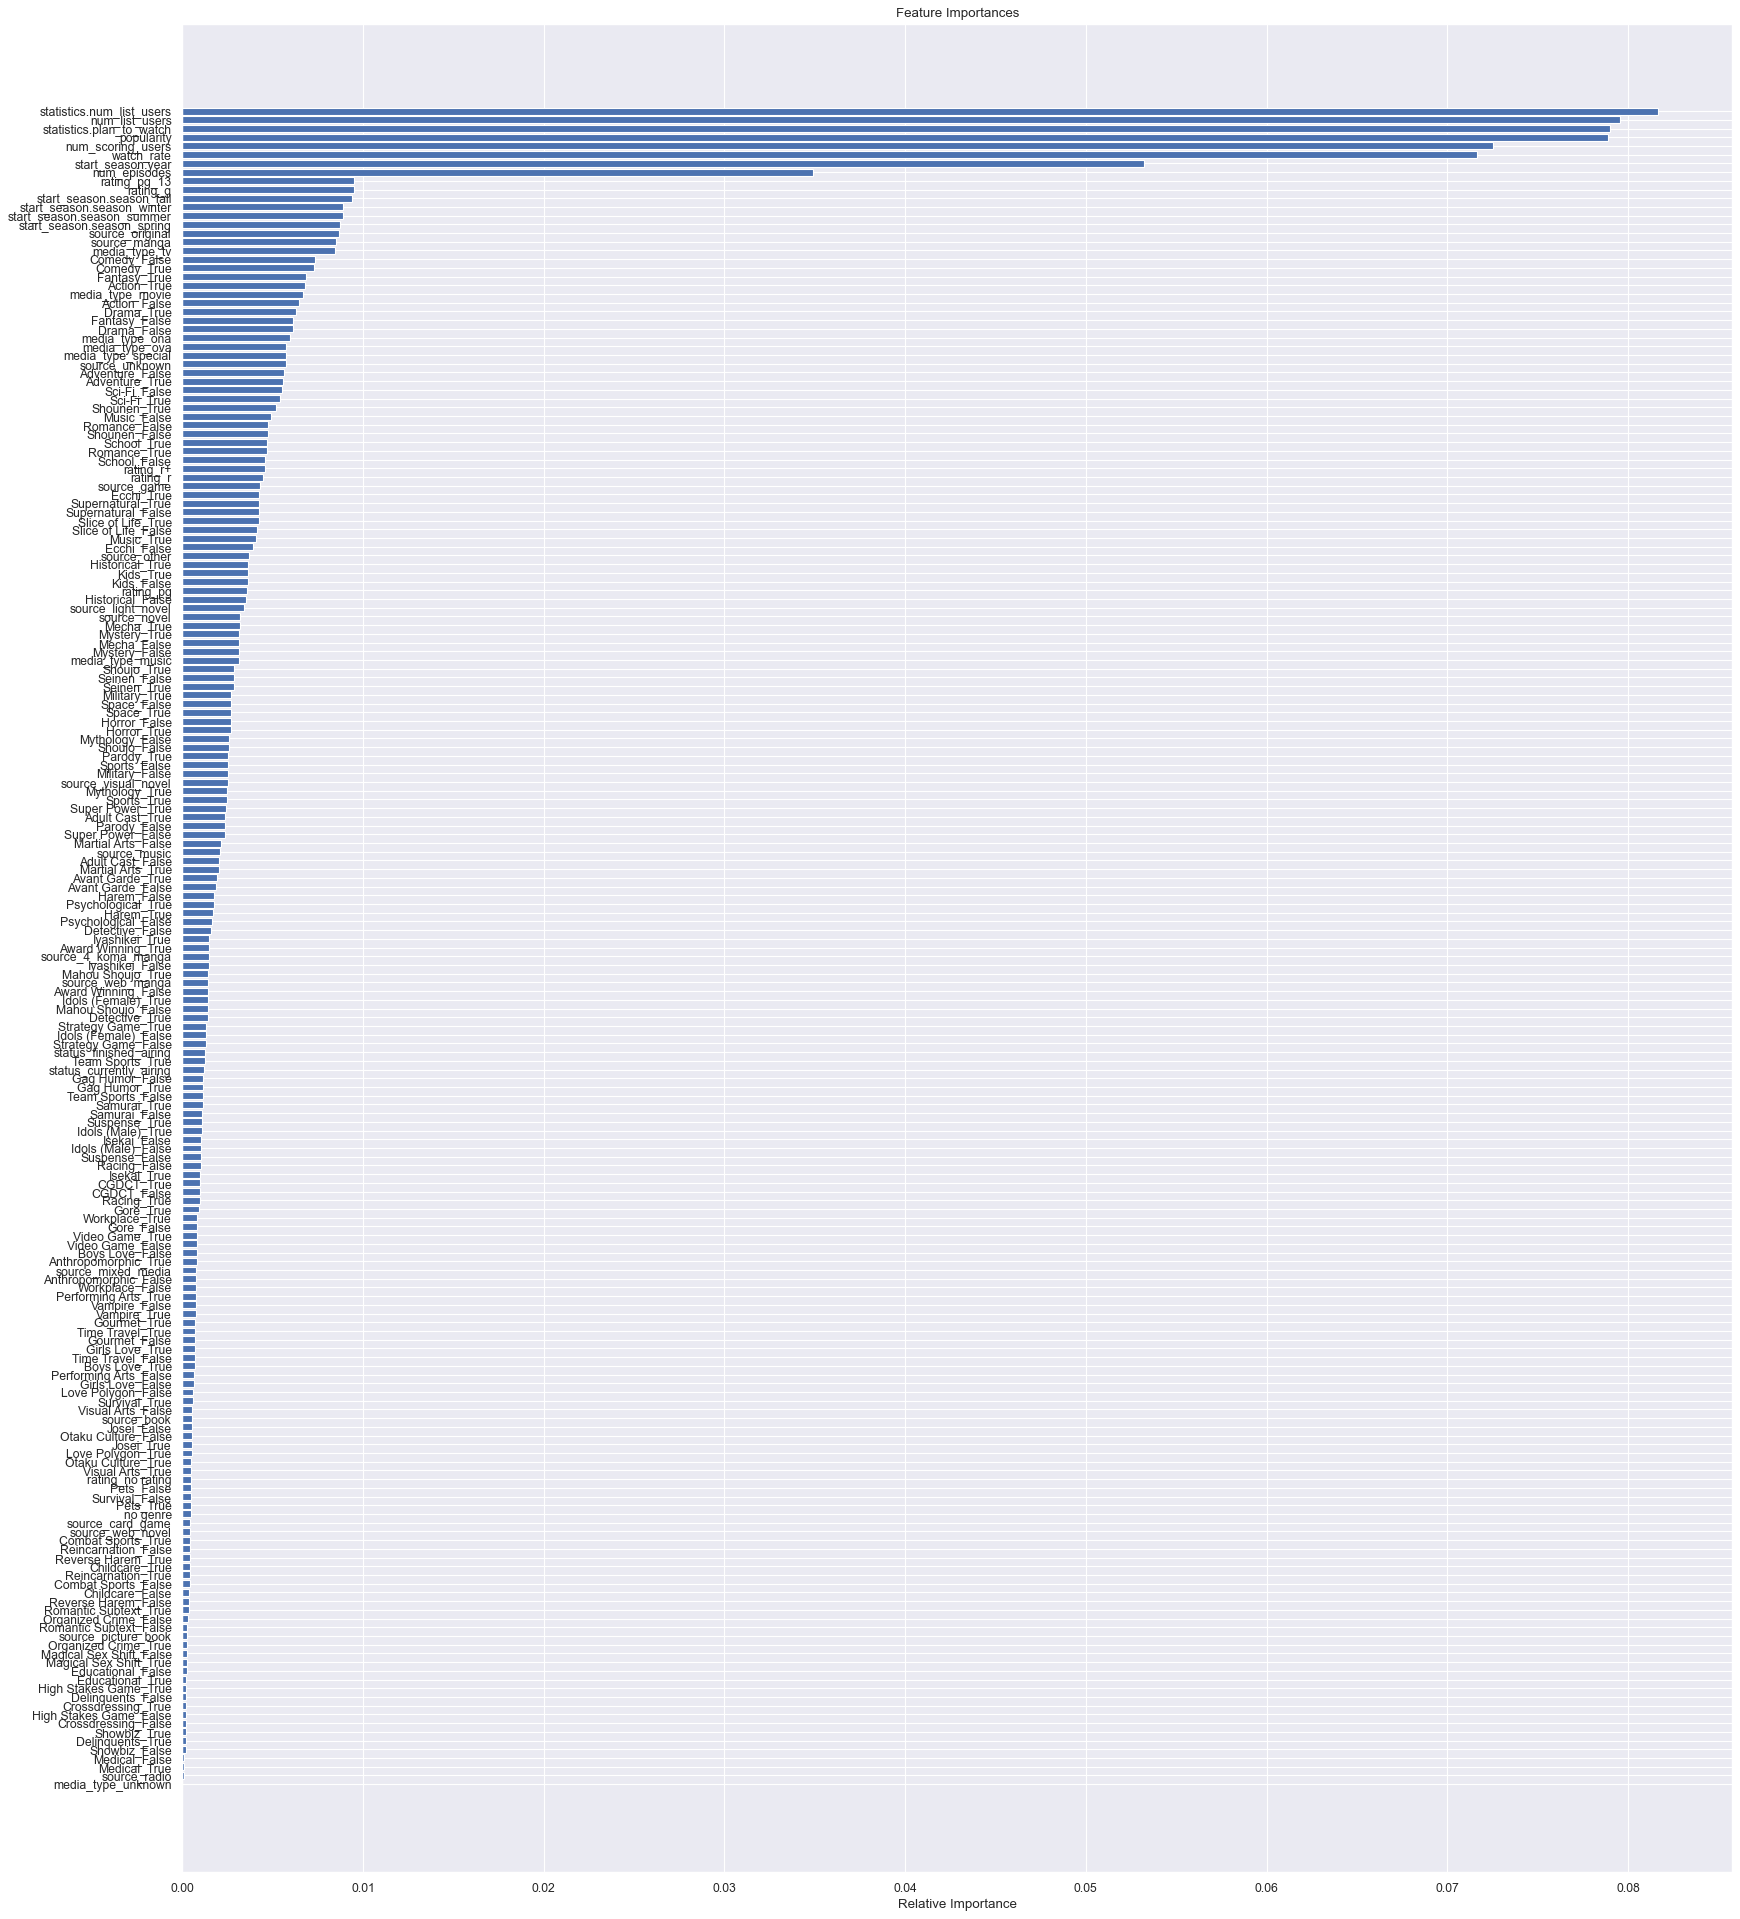

In [29]:
df_OHE_col= pd.get_dummies(data = df_forest,columns=['media_type', 'status','source','rating','start_season.season']+genress)

mean_score = df_forest['mean']

rest_predictor = df_OHE_col.drop(columns = ['rank','id','title','studios','mean'])

# To train test split 


X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

from matplotlib.pyplot import figure

figure(figsize=(25, 30), dpi=80)


features = rest_predictor.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Ranking the variable/features

* The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

* GINI used to rank the features stated below

## The top 10 Features to use for my linear regression

1. Statistics number list user
2. Number of list user
3. Statistics plan to watch
4. Populairty
5. Watch rate
6. Start season year
7. Number of episodes
8. Rating PG 13
9. Rating G
10. Start season Fall



# Prediction with random forest A ML

In [14]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6811771919068056

# Analysis

* With all the features after one hot encoding. Using Random Forest to predict the mean score. 
* From the classification report, there is an accuracy of 0.678, which is moderately high.
* Random forest can be said to be good machine learning model to predict the mean score.

# Drop the non essential columns. Not needed for prediction


* Function to for actual vs predicted values

In [15]:
def plot_actual_vs_pred(y, y_pred, title=None):
    plot_df = pd.concat([pd.DataFrame(y, columns=['mean']), pd.DataFrame(y_pred, columns=['mean_predicted'])], axis=1, join='inner')
    plot_df.sort_values(by=['mean'], inplace=True)
    plot_df.reset_index(inplace=True, drop=True)
    ax = sb.lineplot(data=plot_df)
    if title:
        ax.set_title(title)

In [30]:
df_forest.head()

,id,title,mean,rank,popularity,num_list_users,num_scoring_users,media_type,status,num_episodes,source,rating,studios,start_season.year,start_season.season,statistics.plan_to_watch,statistics.num_list_users,Award Winning,Comedy,High Stakes Game,School,Boys Love,Survival,Adventure,Detective,Educational,Martial Arts,Suspense,Kids,Visual Arts,Video Game,Shoujo,Performing Arts,Adult Cast,Mythology,Sports,Historical,Shounen,Idols (Female),Parody,no genre,Mystery,Iyashikei,Military,Team Sports,Combat Sports,Love Polygon,Workplace,Otaku Culture,Gag Humor,Drama,Vampire,Romance,Seinen,Crossdressing,Reverse Harem,Gourmet,Romantic Subtext,Slice of Life,Medical,Girls Love,Horror,Magical Sex Shift,Action,Gore,Music,Space,Fantasy,Ecchi,Psychological,Delinquents,Mahou Shoujo,Samurai,Super Power,Strategy Game,Isekai,Time Travel,Mecha,Anthropomorphic,Josei,Organized Crime,Showbiz,Harem,Racing,CGDCT,Reincarnation,Sci-Fi,Childcare,Idols (Male),Pets,Supernatural,Avant Garde,watch_rate
0,51535,Shingeki no Kyojin: The Final Season - Kankets...,9.0,1.0,612,345648,94303,special,currently_airing,2,manga,r,"[{'id': 569, 'name': 'MAPPA'}]",2023.0,winter,183136,345560,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.934597
1,5114,Fullmetal Alchemist: Brotherhood,9.0,2.0,3,3108741,1976421,tv,finished_airing,64,manga,r,"[{'id': 4, 'name': 'Bones'}]",2009.0,spring,462639,3108970,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.940232
2,41467,Bleach: Sennen Kessen-hen,9.0,3.0,509,403470,182903,tv,finished_airing,13,manga,r,"[{'id': 1, 'name': 'Pierrot'}]",2022.0,fall,134626,403434,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.972248
3,9253,Steins;Gate,9.0,4.0,13,2393155,1311891,tv,finished_airing,24,visual_novel,pg_13,"[{'id': 314, 'name': 'White Fox'}]",2011.0,spring,600304,2393301,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.924603
4,28977,Gintama°,9.0,5.0,335,581856,232873,tv,finished_airing,51,manga,pg_13,"[{'id': 1258, 'name': 'Bandai Namco Pictures'}]",2015.0,spring,236098,581860,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Fal

# Variables we are using to predict

1. Statistics number list user
2. Number of list user
3. Statistics plan to watch
4. Populairty
5. Watch rate
6. Start season year
7. Number of episodes
8. Rating PG 13
9. Rating G
10. Start season Fall



Intercept of Regression 	: b =  3.113234998749814

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4643784718272673
Mean Squared Error (MSE) 	: 0.46564546850020555

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44387314681418244
Mean Squared Error (MSE) 	: 0.45068092149302347



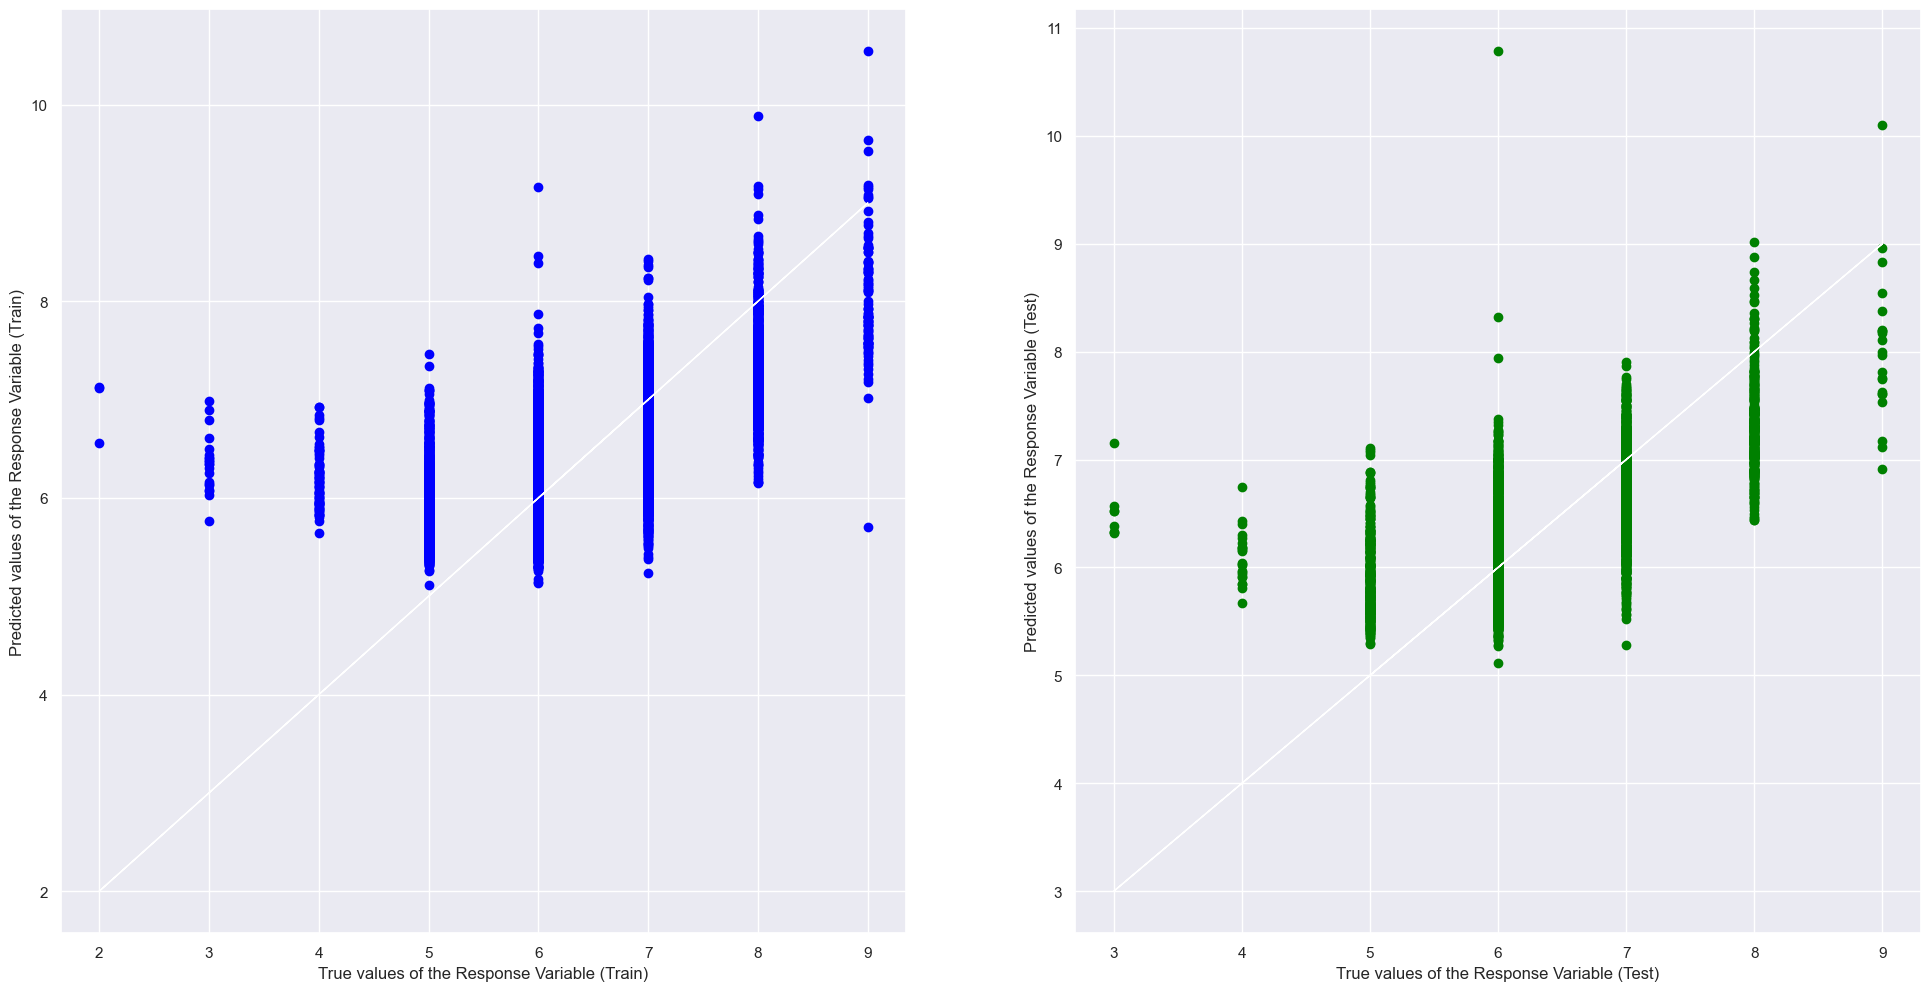

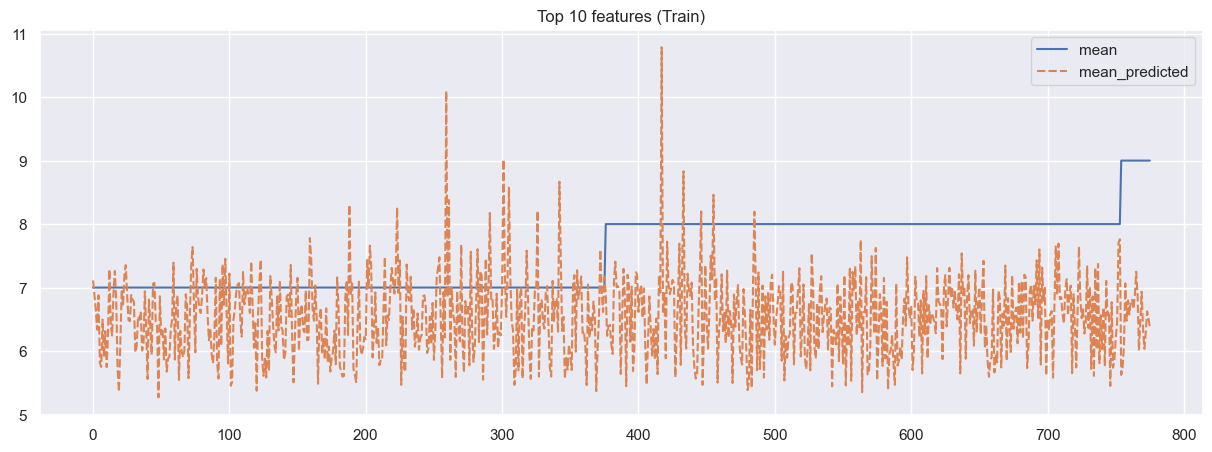

In [41]:
df_OHE_col= pd.get_dummies(data = df_forest,columns=['media_type', 'status','source','rating','start_season.season']+genress)
mean_score = df_OHE_col['mean']
rest_predictor = df_OHE_col[['popularity','statistics.num_list_users','statistics.plan_to_watch','num_scoring_users'
                            ,'num_list_users','watch_rate','start_season.year','num_episodes','rating_pg_13','rating_g','start_season.season_fall']]


X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
#print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title='Top 10 features (Train)')
plt.show()

# Analysis

* When using linear regression with the top 10 features from the random forest, the MSE is moderately high.
* The explained variance is also is moderately as it has a value below 0.5.
* This might suggest that the model is not very fitting of the data.

# Linear Regression with all the variables/features, Multi-variate linear regression

In [42]:
df_complete_or_drop = pd.read_csv('anime_details_cleaned+genres_new.csv')
df_complete_or_drop = df_complete_or_drop.drop(['num_list_users','id','rank','title','popularity','num_scoring_users','start_season.year', 'start_season.season', 'statistics.num_list_users', 'statistics.plan_to_watch', 'statistics.watching', 'statistics.completed', 'statistics.on_hold', 'statistics.dropped'], axis=1)

df_complete_or_drop['studio_name'] = df_complete_or_drop['studios'].astype('str')

df_complete_or_drop['studio_name'] = df_complete_or_drop['studios'].apply(lambda x: ast.literal_eval(str(x)))

def studio_name(row):
    print(row['studio_name'][0]['name'])
    name = row['studio_name'][0]['name']
    return name

df_complete_or_drop['studio_only'] = df_complete_or_drop['studio_name'].apply(lambda x:
                                                x[0].get('name', '')
                                                if len(x) > 0 else 'no studio')


df_complete_or_drop=df_complete_or_drop.drop(['studios','studio_name'],axis=1)

df_complete_or_drop = df_complete_or_drop.dropna()
df_complete_or_drop_no_studios = df_complete_or_drop[df_complete_or_drop['studio_only'] != 'no studio'] # filter 
df_ml = df_complete_or_drop_no_studios



In [ ]:
df_ml
df_all = df_ml
df_OHE_all= pd.get_dummies(data = df_all)
mean_score = df_OHE_all['mean']
rest_predictor = df_OHE_all.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
#print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)

axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title='All the Features (Test)')
plt.show()

Intercept of Regression 	: b =  8264682709.590243



# Analysis

* The train dataset MSE and R^2 value is not the best. With a highly negative and positive value respectively.

# Comparing with top 10 features and all the features

* When using top 10 features, we can see that the test's MSE and R^2 is much better compared to the one above.
* Even though it linear regression might not be a good model to fit these data, however fitting with the top 10 feature drastiscally improves the MSE and R^2 value.
* The linear regression with all the features might be bad due over fitting as there are a lot of features.

# Ridge Regression with top 10 features 

In [19]:
from sklearn.linear_model import Ridge


In [20]:
df_OHE_col= pd.get_dummies(data = df_forest,columns=['media_type', 'status','source','rating']+genress)
mean_score = df_OHE_col[['mean']]
rest_predictor = df_OHE_col[['popularity','statistics.num_list_users','statistics.dropped','statistics.plan_to_watch','num_scoring_users'
                            ,'num_list_users','statistics.completed','statistics.watching','statistics.on_hold','start_season.year']]


X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.46640989311024916
Mean Squared Error (MSE) 	: 0.4531416684627236

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4691298245488905
Mean Squared Error (MSE) 	: 0.46237530423879136



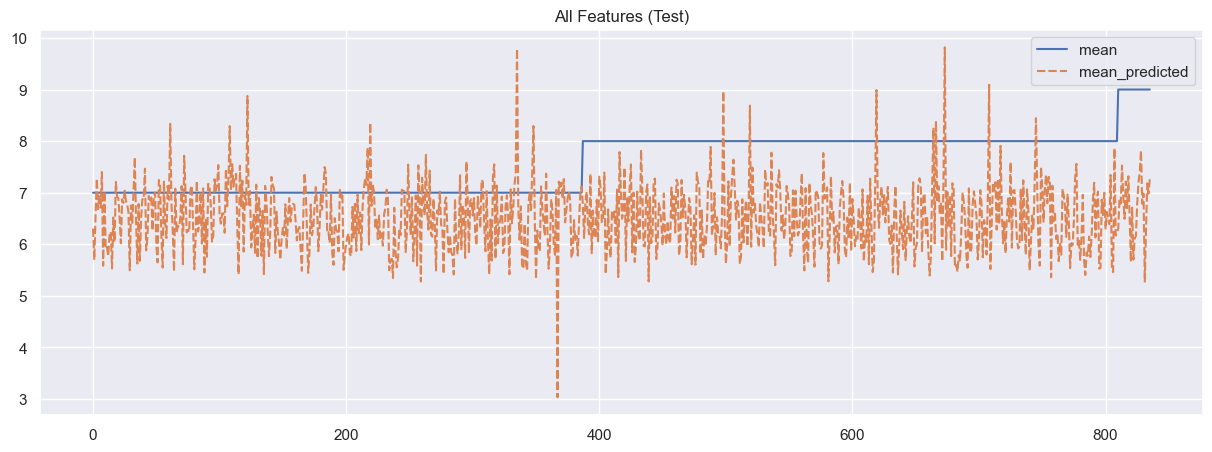

In [21]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Ridge()
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", clf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", clf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
print()

fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_pred, title='All Features (Test)')
plt.show()

# Analysis

* R^2 value for the train dataset is 0.5132 and for the test dataset is 0.4274. This suggests that the model is explaining about 51.32% of the variance in the train dataset and 42.74% of the variance in the test dataset. 


* A lower R^2 value on the test dataset compared to the train dataset suggests that the model may be overfitting to the training data, and may not generalize as well to new, unseen data.


* The MSE for the train dataset is 0.3322 and for the test dataset is 0.3974. The fact that the MSE is higher on the test dataset than the train dataset is consistent with the notion that the model may be overfitting, since it suggests that the model is making larger errors on unseen data.


* Overall, based on the R^2 and MSE values, ridge reegression is relatively a better model but may be overfitting slightly to the training data. 

# Polynomial Regression

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5434147147286496
Mean Squared Error (MSE) 	: 0.39035351185154354

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5325280459129125
Mean Squared Error (MSE) 	: 0.3988668646193279



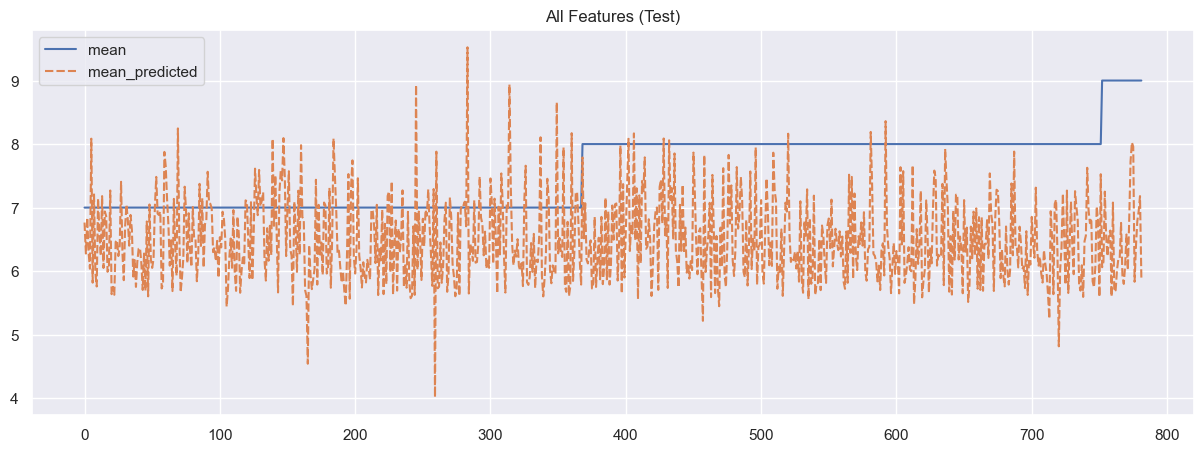

In [22]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  



df_OHE_col= pd.get_dummies(data = df_forest,columns=['media_type', 'status','source','rating']+genress)
mean_score = df_OHE_col[['mean']]
rest_predictor = df_OHE_col[['popularity','statistics.num_list_users','statistics.dropped','statistics.plan_to_watch','num_scoring_users'
                            ,'num_list_users','statistics.completed','statistics.watching','statistics.on_hold','start_season.year']]


X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)


x_poly_train= poly_regs.fit_transform(X_train)  
x_poly_test = poly_regs.fit_transform(X_test) 
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly_train, y_train)  


y_train_pred = lin_reg_2.predict(x_poly_train)
y_test_pred = lin_reg_2.predict(x_poly_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lin_reg_2.score(x_poly_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lin_reg_2.score(x_poly_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title='All Features (Test)')
plt.show()

# Analysis

* The explained variance is the higher out of the other 2 models. But it is still below 0.5

* The mean squared value is still relatively high

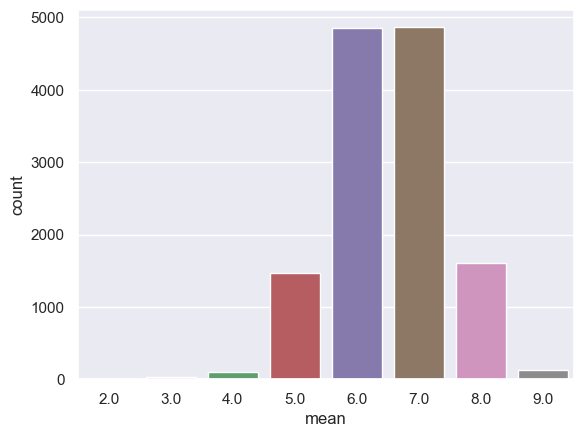

In [23]:
sb.countplot(x="mean", data=df_forest)
plt.show()

# Conclusion - Regression

1. Linear Regression: This model has an R-squared value of 0.44, which indicates that 44% of the variability in the dependent variable can be explained by the independent variables. The MSE is 0.45, which means that the average squared difference between the predicted and actual values is 0.45.


2. Ridge Regression: This model has a slightly higher R-squared value of 0.47, which indicates that 47% of the variability in the dependent variable can be explained by the independent variables. The MSE is 0.46, which is slightly higher than the MSE of the linear regression model.


3. Polynomial Regression: This model has the highest R-squared value of 0.53, indicating that 53% of the variability in the dependent variable can be explained by the independent variables. Additionally, the MSE is the lowest among the three models, at 0.40.


Based on these metrics, the Polynomial Regression model appears to be the best one, as it has the highest R-squared value and the lowest MSE. 

